# **Lab: Week #21 | Quantum Error Correction**
---

### **Description**:
In this week's lab, we will implement a bit flip error correcting code and simulate circuits with several different noise models in Qiskit.


---

## **Part 0: Importing from Qiskit**
---

**Run the code below to import everything needed for this lab.**

In [1]:
#!pip install qiskit

from qiskit import QuantumCircuit, Aer, transpile, assemble, execute, Aer, IBMQ
from qiskit.visualization import plot_histogram

# Import from Qiskit Aer noise module
from qiskit_aer.noise import (NoiseModel, QuantumError, ReadoutError,
    pauli_error, depolarizing_error, thermal_relaxation_error)

import warnings
warnings.filterwarnings('ignore')

provider = IBMQ.load_account()

print("Libraries Imported Successfully!")

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


Libraries Imported Successfully!


## **Part 1: Bit Flip Code**
---

In this section, we will implement and explore a 3-qubit bit flip error correcting code using our 5 step process:
1. Encoding
2. Sending Over Noisy Channel
3. Error Detection
4. Error Correction
5. Decoding

---

### **Step #1: Encoding** 

**Together**, let's create a 3-qubit bit flip encoded quantum circuit. Specifically,
1. Initialize a circuit with 3 qubits and 1 classical bit.

2. Entangle the state of $q_0$ with the other two qubits.

#### **1. Initialize a circuit with 3 qubits and 1 classical bit.**

In [2]:
bitflip_circuit = QuantumCircuit(3,1)

#### **2. Entangle the state of $q_0$ with the other two qubits.**

This can be accomplished by applying two CNOT gates controlled by $q_0$ and targeting the other qubits, $q_1$ and $q_2$.

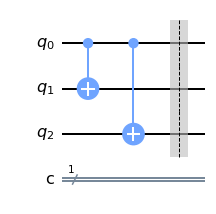

In [3]:
bitflip_circuit.cx(0,1)
bitflip_circuit.cx(0,2)

bitflip_circuit.barrier()
bitflip_circuit.draw()

### **Step #2: Sending Over Noisy Channel** 

**Together**, let's simulate a bit-flip error on $q_0$. **Hint**: What gate flips a qubit from $|0\rangle$ to $|1\rangle$? 

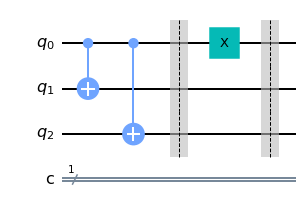

In [4]:
bitflip_circuit.x(0)

bitflip_circuit.barrier()
bitflip_circuit.draw()

### **Step #3: Error Detection** 

Next, we will detect if there's been an error by checking the *parity* (do they agree with each other or are they different?) of $q_0$ with the other qubits using CNOT gates.

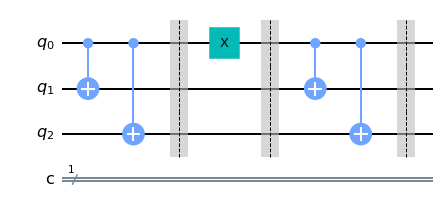

In [5]:
bitflip_circuit.cx(0,1)
bitflip_circuit.cx(0,2)

bitflip_circuit.barrier()
bitflip_circuit.draw()

### **Step #4: Error Correction** 

We will update $q_0$ if both $q_1$ and $q_2$ have detected a bit flip so that $q_0$ stores the correct logical state. Specifically, apply the Toffoli (CCX) gate controlled by $q_2$ and $q_1$, targeting $q_0$.

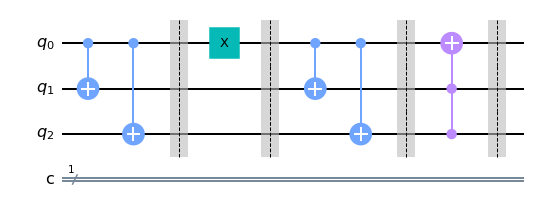

In [6]:
bitflip_circuit.ccx(2,1,0)

bitflip_circuit.barrier()
bitflip_circuit.draw()

### **Step #5: Decoding**

The logical state has been stored in $q_0$, so we will measure this to decode the final logical state.

**Run the code below to simulate measuring the first qubit at the end of this circuit.**

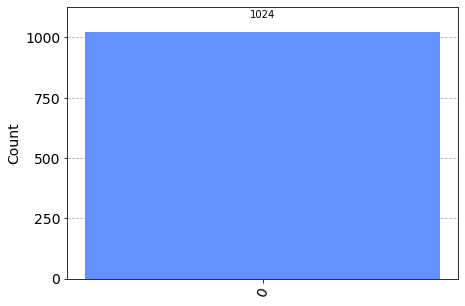

In [7]:
bitflip_circuit.measure(0, 0)

backend = Aer.get_backend('qasm_simulator')
job = execute(bitflip_circuit, backend = backend, shots = 1024)

result = job.result()
counts = result.get_counts()

plot_histogram(counts)

### **Exercise #1** 

The code below combines our work from above. 

**Together**, let's modify this code so that the logical qubit is in the $|1\rangle$ state instead of the $|0\rangle$ state.

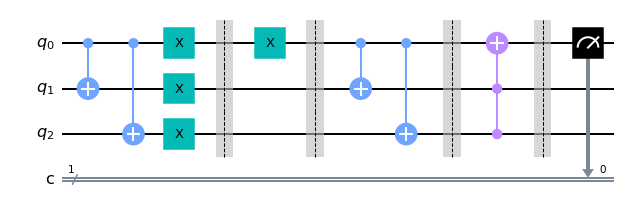

In [8]:
# ENCODING
bitflip_circuit = QuantumCircuit(3, 1)
bitflip_circuit.cx(0, 1) 
bitflip_circuit.cx(0, 2)

bitflip_circuit.x(0)
bitflip_circuit.x(1)
bitflip_circuit.x(2)
bitflip_circuit.barrier()


# NOISY CHANNEL
bitflip_circuit.x(0)
bitflip_circuit.barrier()


# ERROR DETECTION
bitflip_circuit.cx(0, 1) 
bitflip_circuit.cx(0, 2)
bitflip_circuit.barrier()


# ERROR CORRECTION
bitflip_circuit.ccx(2, 1, 0)
bitflip_circuit.barrier()


# DECODING
bitflip_circuit.measure(0, 0)
bitflip_circuit.draw()

#### **Run the code below to simulate this circuit.**

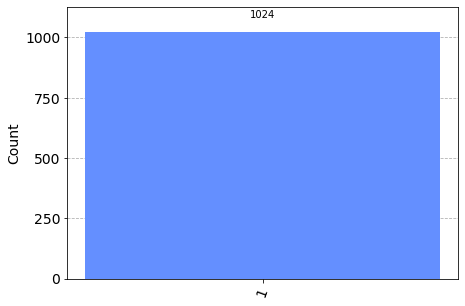

In [9]:
backend = Aer.get_backend('qasm_simulator')
job = execute(bitflip_circuit, backend = backend, shots = 1024)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

### **[OPTIONAL] Exercise #2**

Modify the code below to prepare the logical qubit in the $|+\rangle$ state.

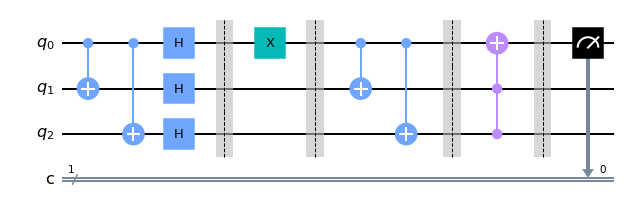

In [10]:
# ENCODING
bitflip_circuit = QuantumCircuit(3, 1)
bitflip_circuit.cx(0, 1) 
bitflip_circuit.cx(0, 2)

bitflip_circuit.h(0)
bitflip_circuit.h(1)
bitflip_circuit.h(2)

bitflip_circuit.barrier()


# NOISY CHANNEL
bitflip_circuit.x(0)
bitflip_circuit.barrier()


# ERROR DETECTION
bitflip_circuit.cx(0, 1) 
bitflip_circuit.cx(0, 2)
bitflip_circuit.barrier()


# ERROR CORRECTION
bitflip_circuit.ccx(2, 1, 0)
bitflip_circuit.barrier()


# DECODING
bitflip_circuit.measure(0, 0)
bitflip_circuit.draw()

#### **Run the code below to simulate this circuit.**

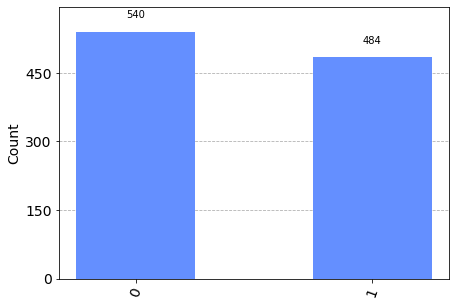

In [11]:
backend = Aer.get_backend('qasm_simulator')
job = execute(bitflip_circuit, backend = backend, shots = 1024)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

### **[OPTIONAL] Exercise #3**

Modify the code below with the logical qubit in the $|0\rangle$ state and with a bit flip error on $q_1$ instead of $q_0$.

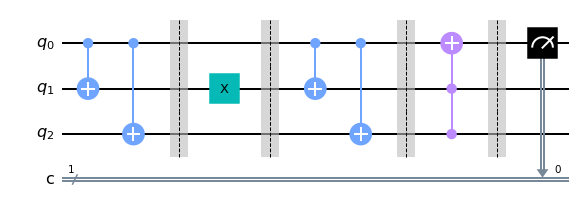

In [12]:
# ENCODING
bitflip_circuit = QuantumCircuit(3, 1)
bitflip_circuit.cx(0, 1) 
bitflip_circuit.cx(0, 2)
bitflip_circuit.barrier()


# NOISY CHANNEL
bitflip_circuit.x(1)
bitflip_circuit.barrier()


# ERROR DETECTION
bitflip_circuit.cx(0, 1) 
bitflip_circuit.cx(0, 2)
bitflip_circuit.barrier()


# ERROR CORRECTION
bitflip_circuit.ccx(2, 1, 0)
bitflip_circuit.barrier()


# DECODING
bitflip_circuit.measure(0, 0)
bitflip_circuit.draw()

#### **Run the code below to simulate this circuit.**

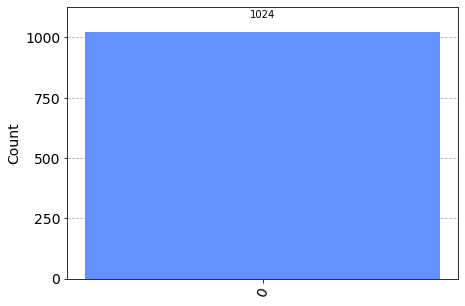

In [13]:
backend = Aer.get_backend('qasm_simulator')
job = execute(bitflip_circuit, backend = backend, shots = 1024)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

### **[OPTIONAL] Exercise #4**

Modify the code below, with the logical qubit in the $|0\rangle$ state, so that there's a bit flip error on both $q_0$ and $q_1$.

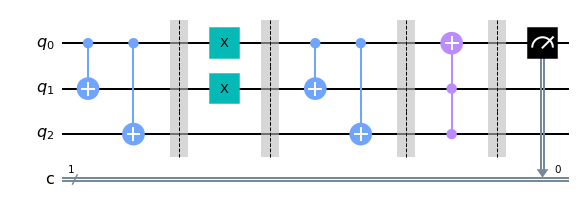

In [14]:
# ENCODING
bitflip_circuit = QuantumCircuit(3, 1)
bitflip_circuit.cx(0, 1) 
bitflip_circuit.cx(0, 2)
bitflip_circuit.barrier()


# NOISY CHANNEL
bitflip_circuit.x(0)
bitflip_circuit.x(1)
bitflip_circuit.barrier()


# ERROR DETECTION
bitflip_circuit.cx(0, 1) 
bitflip_circuit.cx(0, 2)
bitflip_circuit.barrier()


# ERROR CORRECTION
bitflip_circuit.ccx(2, 1, 0)
bitflip_circuit.barrier()


# DECODING
bitflip_circuit.measure(0, 0)
bitflip_circuit.draw()

#### **Run the code below to simulate this circuit.**

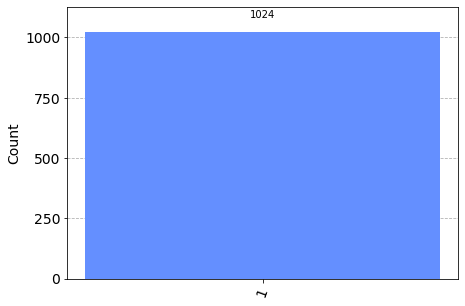

In [15]:
backend = Aer.get_backend('qasm_simulator')
job = execute(bitflip_circuit, backend = backend, shots = 1024)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

### **Followup Activities**

To further hone your understanding of the bit flip code, consider trying the following activities:
* Remove parts of the circuit such as the parity checks or error correcting Toffoli to see what happens.
* Alter this code to correct for an error on a different qubit.
* Expand this 3 qubit error correcting code to a 4+ qubit error correcting code. Can these sustain more errors than the one above? Are there patterns to how many errors an *n* qubit code can handle?

## **Part 2: Qiskit Noise Models**
---

In this section, we will implement and explore noise models in Qiskit using the Aer Noise module.

### **Exercise #1**

**Together**, let's create an empty noise model.

In [ ]:
noise_model = 

print(noise_model)

### **Exercise #2** 

**Together**, let's create a bit flip error that happens with a 75% probability.

In [ ]:
p_measurement = # COMPLETE THIS LINE
error = pauli_error([('X', p_measurement), ('I', 1 - p_measurement)])

print(error)

### **Exercise #3**

**Together**, let's add this error to the empty noise model so that it happens for X gates applied to the 0th qubit of a given circuit.

In [ ]:
noise_model.add_quantum_error(error, "x", [0])

print(noise_model)

### **Exercise #4**

**Together**, let's simulate a circuit that prepares the $|1\rangle$ state with this noise model. Specifically, let's:
1. Create a 1 qubit and 1 classical bit circuit that prepares the qubit in the $|1\rangle$ state and then measures.
2. Simulate this circuit with the noise model included.

#### **1. Create a 1 qubit and 1 classical bit circuit that prepares the qubit in the $|1\rangle$ state and then measures.**

In [ ]:
# COMPLETE THIS CODE

qc.draw()

#### **2. Simulate this circuit with the noise model included.**

In [ ]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend = backend, shots = 1024, noise_model = noise_model)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

### **Exercise #5**

**Independently**, simulate a circuit that prepares the Bell state $\beta_{00} = \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$ with this noise model. Specifically:
1. Create a 2 qubit and 2 classical bit circuit that prepares the qubits in the Bell state $\beta_{00}$ and then measures both qubits.
2. Simulate this circuit with the noise model included.

#### **1. Create a 2 qubit and 2 classical bit circuit that prepares the qubits in the Bell state $\beta_{00}$ and then measures both qubits.**

In [ ]:
# COMPLETE THIS CODE

qc.draw()

#### **2. Simulate this circuit with the noise model included.**

In [ ]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend = backend, shots = 1024, noise_model = noise_model)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

### **Exercise #6**

One way to simulate errors is by using an existing noisy backend. Real quantum hardware is not perfect and has errors, so Qiskit provides a way to extract the noise model from their devices.

**Run the code below to simulate creating the $\beta_{00}$ state on `'ibm_oslo'`.**

In [ ]:
# Make a circuit
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)
qc.measure([0, 1], [0, 1])


# Extract the necessary information about the quantum hardware
simulated_backend = provider.get_backend('ibm_oslo')

noise_model = NoiseModel.from_backend(simulated_backend)
coupling_map = backend.configuration().coupling_map
basis_gates = noise_model.basis_gates


# Perform a noisy simulation
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend = backend, shots = 1024, 
              noise_model = noise_model,
              coupling_map = coupling_map,
              basis_gates = basis_gates)

result = job.result()
counts = result.get_counts()
plot_histogram(counts)

### **[OPTIONAL] Exercise #7**

Simulate a circuit that prepares the Bell state $\beta_{01} = \frac{1}{\sqrt{2}}(|01\rangle + |10\rangle)$ with either the noise model from Exercises #1 - 5 or Exercise #6. Specifically:
1. Create a 2 qubit and 2 classical bit circuit that prepares the qubits in the Bell state $\beta_{01}$ and then measures both qubits.
2. Simulate this circuit with the noise model included.

#### **1. Create a 2 qubit and 2 classical bit circuit that prepares the qubits in the Bell state $\beta_{01}$ and then measures both qubits.**

<br>


**Reminder**: $\beta_{01} = X_0\beta_{00}$. In other words, we can apply the X gate to the 0th qubit after preparing $\beta_{00}.

In [ ]:
# COMPLETE THIS CODE

qc.draw()

#### **2. Simulate this circuit with the noise model included.**

In [ ]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend = backend, shots = 1024, noise_model = noise_model)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

### **[OPTIONAL] Exercise #8**

Simulate the same logical circuit as Exercise #4 but encoded with our 3 qubit bit flip code developed in Part 1. Specifically:
1. Create the 3 qubit bit flip code circuit for the $|1\rangle$ state.
2. Simulate this circuit with the same noise model included.

#### **1. Create the 3 qubit bit flip code circuit for the $|1\rangle$ state.**

**NOTE**: The entire code is already provided in Part 1.

In [ ]:
# COMPLETE THIS CODE

qc.draw()

#### **2. Simulate this circuit with the noise model included.**

In [ ]:
backend = Aer.get_backend('qasm_simulator')
job = execute(bitflip_circuit, backend = backend, shots = 1024, noise_model = noise_model)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

### **[OPTIONAL] Exercise #9**

Simulate the same logical circuit as above, but with the same error channel for all three qubits. Specifically:
1. Create the 3 qubit bit flip code circuit for the $|1\rangle$ state.
2. Simulate this circuit with the new noise model.

#### **1. Create the 3 qubit bit flip code circuit for the $|1\rangle$ state.**

**NOTE**: This code is identical to Exercise #7 above.

In [ ]:
# COMPLETE THIS CODE

qc.draw()

#### **2. Simulate this circuit with the noise model included.**

In [ ]:
# CREATE NOISE MODEL
noise_model = NoiseModel()

p_measurement = 0.75
error = pauli_error([('X', p_measurement), ('I', 1 - p_measurement)])

noise_model.add_all_qubit_quantum_error(error, "x")


# SIMULATE WITH NOISE MODEL
backend = Aer.get_backend('qasm_simulator')
job = execute(bitflip_circuit, backend = backend, shots = 1024, noise_model = noise_model)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

### **[OPTIONAL] Exercise #10**

Simulate the same circuit as in Exercise #4, but with a new noise model that creates a bit flip error for all qubits with measurements instead of X gates. Specifically:
1. Create a 1 qubit and 1 classical bit circuit that prepares the qubit in the $|1\rangle$ state and then measures.
2. Simulate this circuit with the new noise model.

#### **1. Create a 1 qubit and 1 classical bit circuit that prepares the qubit in the $|1\rangle$ state and then measures.**

**NOTE**: This part is identical to Exercise #4's circuit creation.

In [ ]:
# COMPLETE THIS CODE

qc.draw()

#### **2. Simulate this circuit with the noise model included.**

In [ ]:
# CREATE NOISE MODEL
noise_model = NoiseModel()

p_error = 0.75
error = pauli_error([('X', p_error), ('I', 1 - p_error)])

noise_model.add_all_qubit_quantum_error(error, "measurement")


# SIMULATE WITH NOISE MODEL
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend = backend, shots = 1024, noise_model = noise_model)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

# End of Lab

---

© 2023 The Coding School, All rights reserved